<a href="https://colab.research.google.com/github/LUCKY1404/Bharat_Intern/blob/main/Iris_Flower_Classificatin/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing


Loading the iris dataset

In [2]:
dataset=pd.read_csv("/content/irisflowerdataset.csv")
print(dataset)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


Visualizing the dataset

In [3]:
print(dataset.shape)

(150, 5)


In [4]:
print(dataset.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


Checking for any null value

In [5]:
print(dataset.isna().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [6]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Checking for the outliers in the data

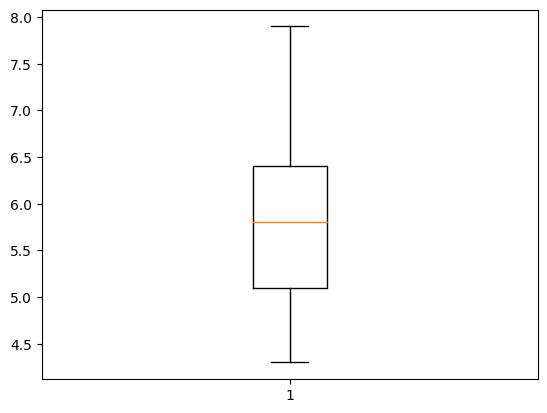

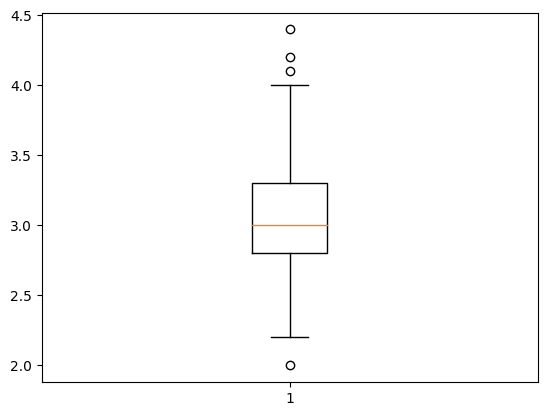

In [7]:
plt.figure(1)
plt.boxplot([dataset['sepal_length']])
plt.figure(2)
plt.boxplot([dataset['sepal_width']])
plt.show()

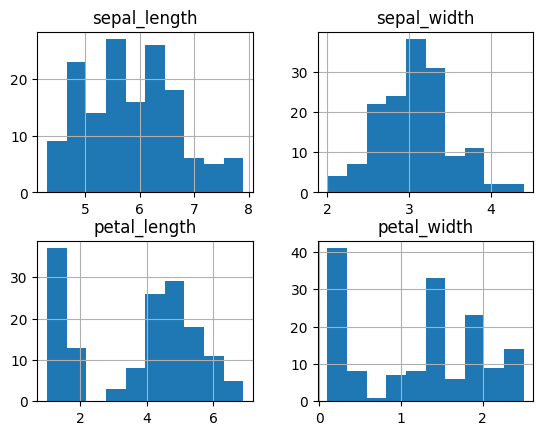

In [8]:
dataset.hist()
plt.show()

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

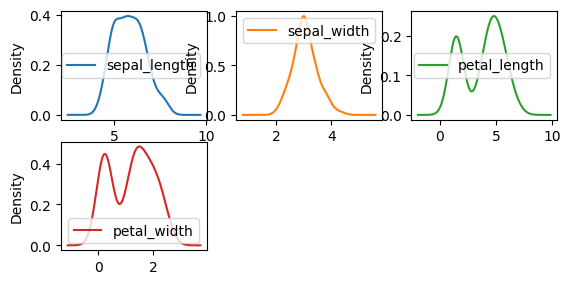

In [9]:
dataset.plot(kind ='density',subplots = True, layout =(3,3),sharex = False)

sepal_length       Axes(0.125,0.53;0.133621x0.35)
sepal_width     Axes(0.285345,0.53;0.133621x0.35)
petal_length     Axes(0.44569,0.53;0.133621x0.35)
petal_width     Axes(0.606034,0.53;0.133621x0.35)
dtype: object

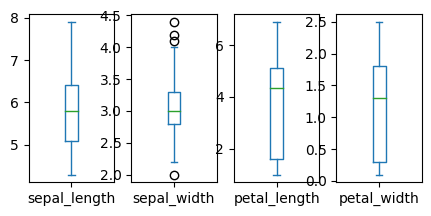

In [10]:
dataset.plot(kind ='box',subplots = True, layout =(2,5),sharex = False)

In [11]:
X = dataset['sepal_length'].values.reshape(-1,1)
Y = dataset['sepal_width'].values.reshape(-1,1)

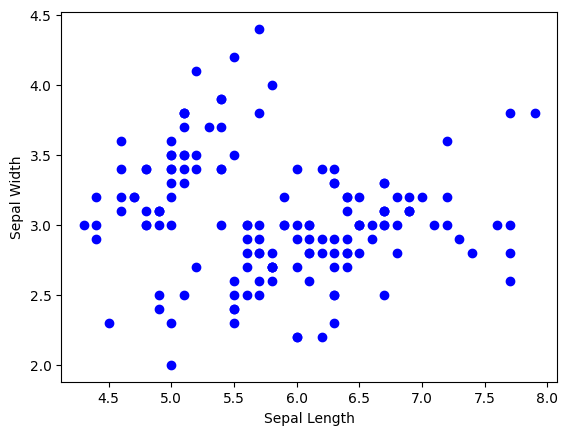

In [12]:
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.scatter(X,Y,color='b')
plt.show()

Finding correlation matrix

In [13]:
corr_mat = dataset.corr()
print(corr_mat)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


<ipython-input-13-ef4192b41616>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = dataset.corr()


*Encoding the species column *

Here each value is converted to a number.

Iris-setosa:0, Iris-versicolor:1, and Iris-virginica:2

In [14]:
le = preprocessing.LabelEncoder()
dataset.species = le.fit_transform(dataset.species)


Importing necessary machine learning models

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

Splliting the dataset into train and test dataset

In [16]:
train, test = train_test_split(dataset, test_size = 0.25)
print(train.shape)
print(test.shape)

(112, 5)
(38, 5)


Separating labels and features

In [17]:
train_X = train.iloc[:, :-1]
train_y = train.species

test_X = test[['sepal_length', 'sepal_width', 'petal_length','petal_width']]
test_y = test.species

In [18]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(112, 4)
(112,)
(38, 4)
(38,)


In [19]:
test_y.head()

108    2
1      0
49     0
111    2
92     1
Name: species, dtype: int64

Using Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(train_X,train_y)
y_pred4 = model4.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred4))

Accuracy Score: 0.9473684210526315


Using Support Vector

In [24]:
from sklearn.svm import SVC
model1 = SVC()
model1.fit(train_X,train_y)

pred_y = model1.predict(test_X)

from sklearn.metrics import accuracy_score
print("Acc=",accuracy_score(test_y,pred_y))

Acc= 1.0


Evaluating the model

In [21]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_mat = confusion_matrix(test_y,y_pred4)
print("Confusion matrix: \n",confusion_mat)
print(classification_report(test_y,y_pred4))

Confusion matrix: 
 [[11  0  0]
 [ 0 14  0]
 [ 0  2 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      1.00      0.93        14
           2       1.00      0.85      0.92        13

    accuracy                           0.95        38
   macro avg       0.96      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



cross validation scores

In [22]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model4, train_X, train_y, cv=5)
print("Cross-validation scores:", scores)

Cross-validation scores: [0.95652174 0.95652174 0.90909091 0.86363636 0.95454545]


Using Random Forest Regression



In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'min_samples_split' : [3,4,6,10], 'n_estimators' : [70,100], 'random_state': [5] }
grid_rf = GridSearchCV(RandomForestRegressor(), param_grid, refit=True, verbose = 0)
grid_rf.fit(train_X, train_y)

pred_rf = grid_rf.predict(test_X)

Evaluating the model

using r2 score

In [27]:
from sklearn.metrics import r2_score
r2_score(test_y, pred_rf)

0.9609152348147365

using rmse

In [28]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, pred_rf)
rmse = mse**.5
print(rmse)

0.15677004435237638


using mae

In [29]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(test_y,pred_rf))

MAE 0.06799243780446793


cross validation score

In [30]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(grid_rf, train_X, train_y, cv=5)
print("Cross-validation scores:", scores)

Cross-validation scores: [0.97096746 0.91222274 0.89463156 0.93168053 0.94857733]


Applying K-Means Clustering

In [31]:
from sklearn.cluster import KMeans

In [32]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(train_X,train_y)
    wcss.append(kmeans.inertia_)

Using elbow method to determine optimal number of clusters

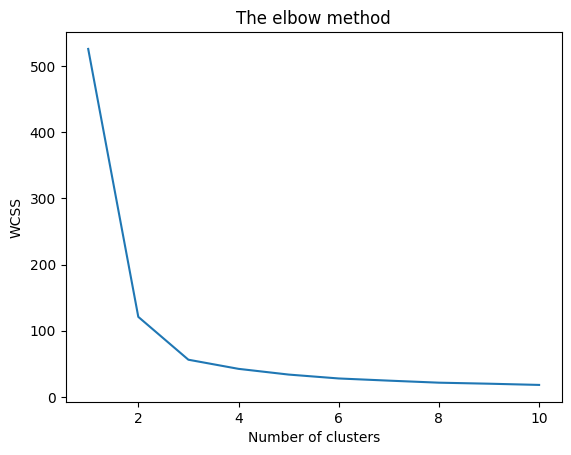

In [33]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

Implementing K- means clustering

In [34]:
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit(train_X, train_y)
train_labels= kmeans.predict(train_X)
test_labels = kmeans.predict(test_X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


accuracy

In [35]:
print(accuracy_score(train_y, train_labels)*100)
print(accuracy_score(test_labels, test_y)*100)

43.75
47.368421052631575


classification report

In [36]:
print(classification_report(train_y, train_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.03      0.03      0.03        36
           2       0.20      0.24      0.22        37

    accuracy                           0.44       112
   macro avg       0.41      0.42      0.42       112
weighted avg       0.43      0.44      0.43       112



Visualising the clusters and plotting their centeroids

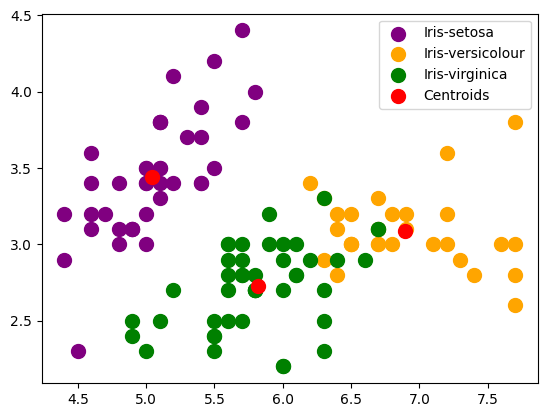

In [37]:
train_X = np.array(train_X)
plt.scatter(train_X[train_labels == 0,0], train_X[train_labels == 0,1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(train_X[train_labels == 1, 0], train_X[train_labels == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(train_X[train_labels == 2, 0], train_X[train_labels == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()


3-d scatterplot

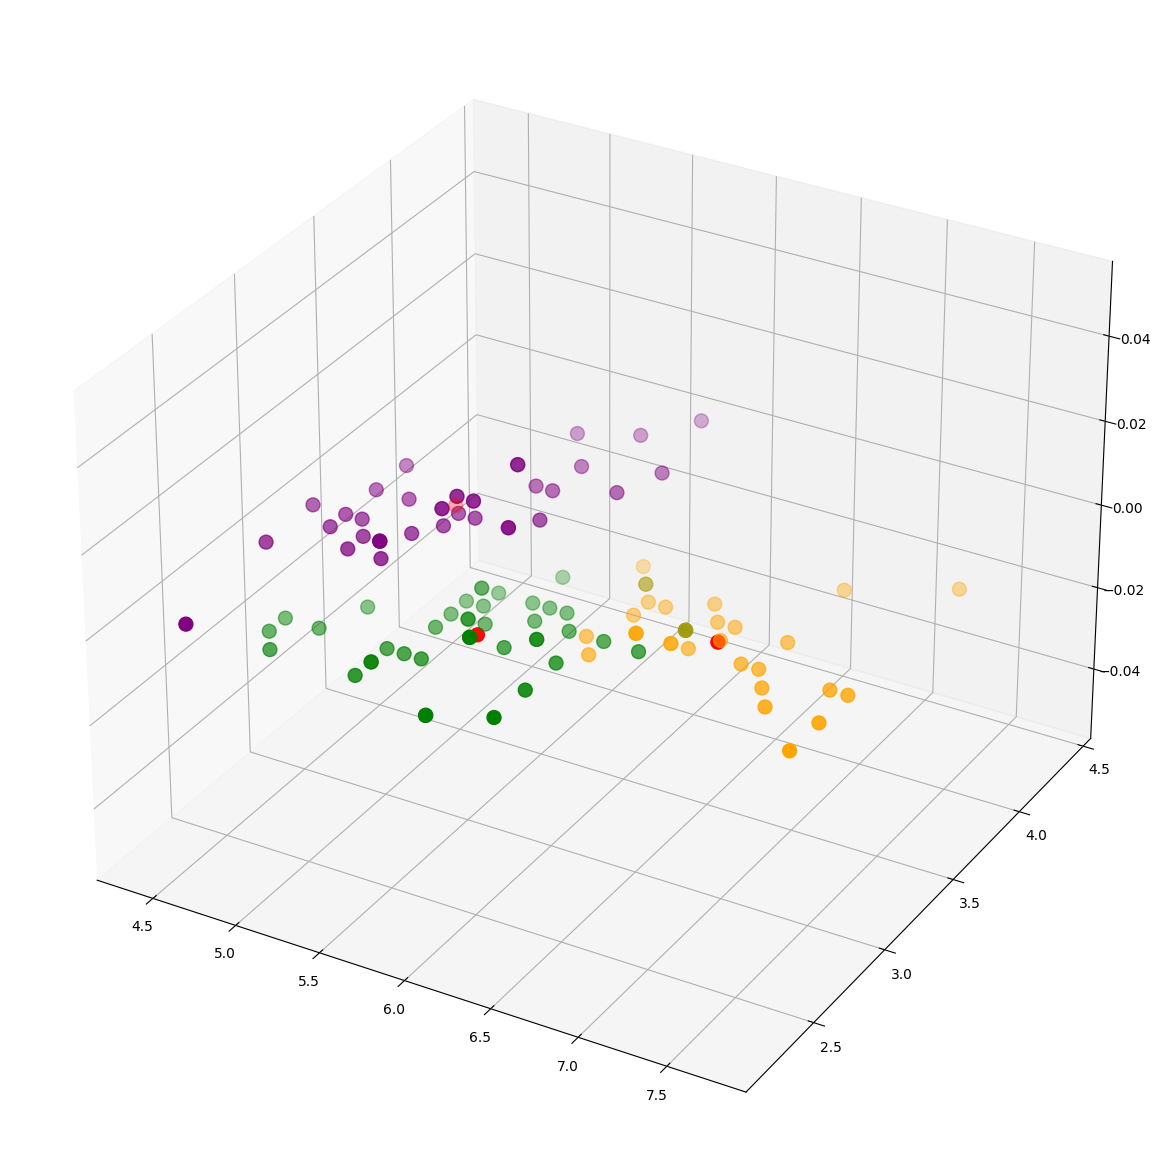

In [38]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(train_X[train_labels == 0, 0],train_X [train_labels == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(train_X[train_labels== 1, 0], train_X[train_labels == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(train_X[train_labels == 2, 0], train_X[train_labels == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()